In [1]:
import pandas as pd
import numpy as np
import json 
import math
import collections
import seaborn as sns
import networkx as nx
from matplotlib import pyplot as plt


# Data Preparation 

In [3]:
filename = '../data/centralities.json'

In [11]:
G = nx.read_weighted_edgelist(f'../data/RW.weighted.edgelist')

FileNotFoundError: [Errno 2] No such file or directory: '../data/RW.weighted.edgelist'

In [12]:

weights = [G.edges[edge]['weight'] for edge in G.edges()]
maxW = max(weights) 
for edge in G.edges():
    # G.edges[edge]['dissimilarity'] = 10000 - G.edges[edge]['weight']
    G.edges[edge]['dissimilarity'] =  maxW+1 - G.edges[edge]['weight']

NameError: name 'G' is not defined

In [27]:
components =  [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
avg_size = np.average([len(c) for c in components[1:]])
print('average componets size: ', avg_size)
print(len(components))
print([len(c) for c in components[:20]],'etc...')

C = G.subgraph(components[0])


average componets size:  2.176470588235294
35
[15003, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] etc...


In [10]:
import pandas as pd
df = pd.read_csv("../../data_collection/data/tuscany.csv",index_col=0)

for node in C.nodes():
    C.nodes[node]['name'] = df.loc[int(node),'name']
    
df.head()

NameError: name 'C' is not defined

In [114]:
def plot_kcentral(G,dictionary,k=10, h = False, size = None):
    sorted_dictionary =  sorted(dictionary.items(), key=lambda x: x[1],reverse = True)
    nodes, values = zip(*sorted_dictionary)
    maxval = max(values)
    minval = min(values)
    normalizer = maxval - minval 
    values = [(value - minval)/normalizer for value in values]
    nodes = nodes[:k]
    values = values[:k]
    
    names = [G.nodes[node]['name'] for node in nodes]
    
    
    if h : 
        if size == None: size = (k,k/2)
        plt.figure(figsize=size)
        plt.barh(names, values, color=sns.color_palette('ocean',k))
        
    else:
        if size == None: size = (2*k,k/2)
        plt.figure(figsize=size)
        plt.bar(names, values, color=sns.color_palette('ocean',k))
        plt.xticks(rotation=25,ha='right',x=300)

# Centralities
### Degree Centrality

In [31]:
degree_centrality = nx.degree_centrality(G)

In [33]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['degree_centrality'] = degree_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

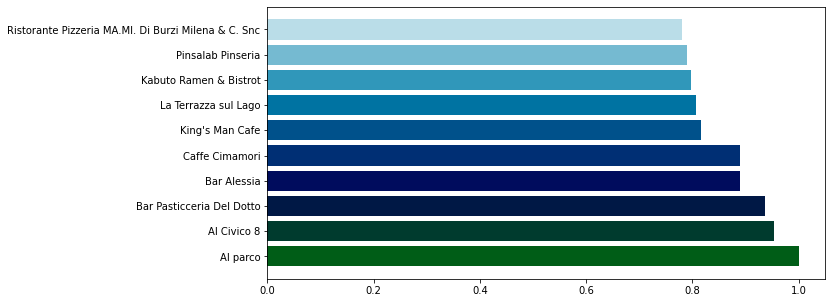

In [115]:
plot_kcentral(G,degree_centrality,h=True)

### Eigenvector Centrality

In [40]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='dissimilarity', max_iter=1000)

In [41]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['weighted_eigenvector_centrality'] = eigenvector_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

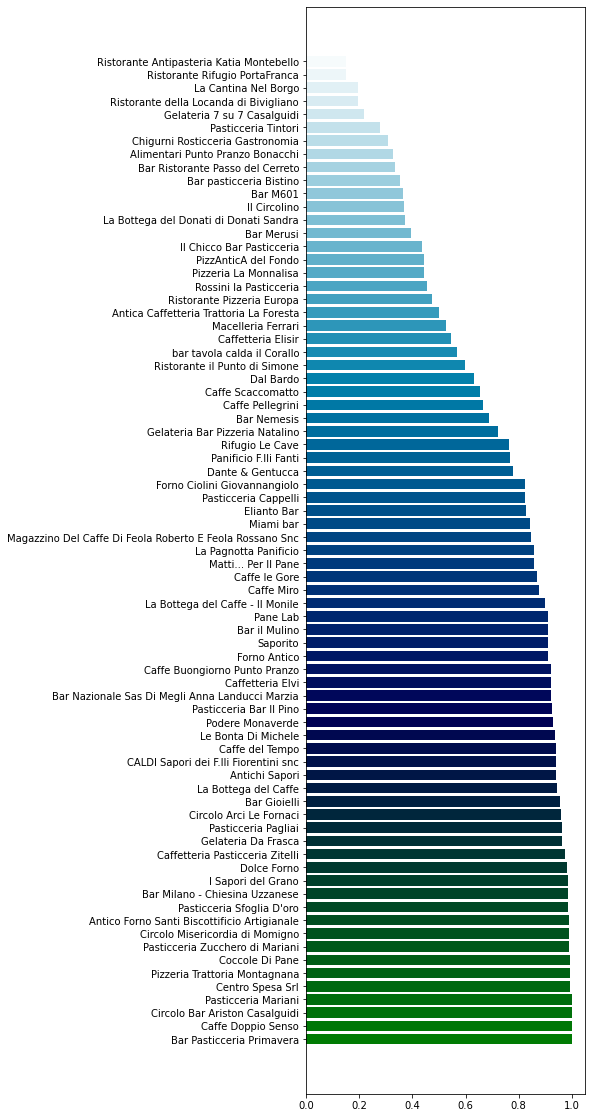

In [124]:
plot_kcentral(G,eigenvector_centrality,k=75, h=True,size=(5,20))

### Katz ceytrality

In [43]:
katz_centrality = nx.katz_centrality(G, weight='dissimilarity', max_iter=2500)

KeyboardInterrupt: 

In [ ]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['weighted_katz_centrality'] = katz_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

In [ ]:
plot_kcentral(G,katz_centrality)

In [44]:
pagerank_centrality = nx.pagerank(G, weight='dissimilarity')

In [45]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['weighted_pagerank_centrality'] = pagerank_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

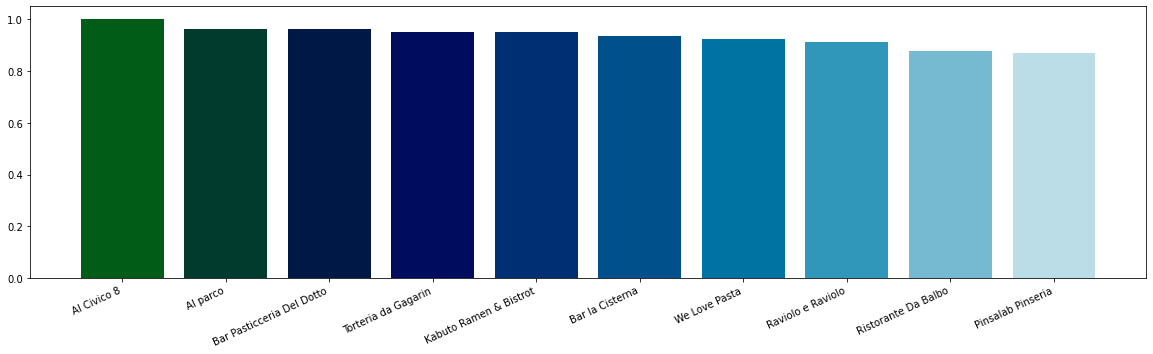

In [117]:
plot_kcentral(G,pagerank_centrality,k=10)

### Pagerank Centrality

In [44]:
pagerank_centrality = nx.pagerank(G, weight=None)

In [45]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['pagerank_centrality'] = pagerank_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

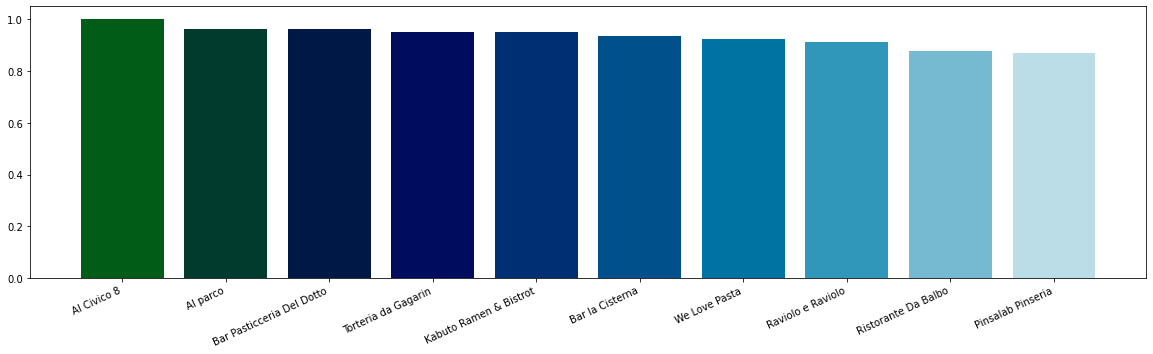

In [118]:
plot_kcentral(G,pagerank_centrality,k=10)

### Betweenness Centrality

In [47]:
betweenness_centrality = nx.betweenness_centrality(G, weight=None)

In [48]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['betwenness_centrality'] = betweenness_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

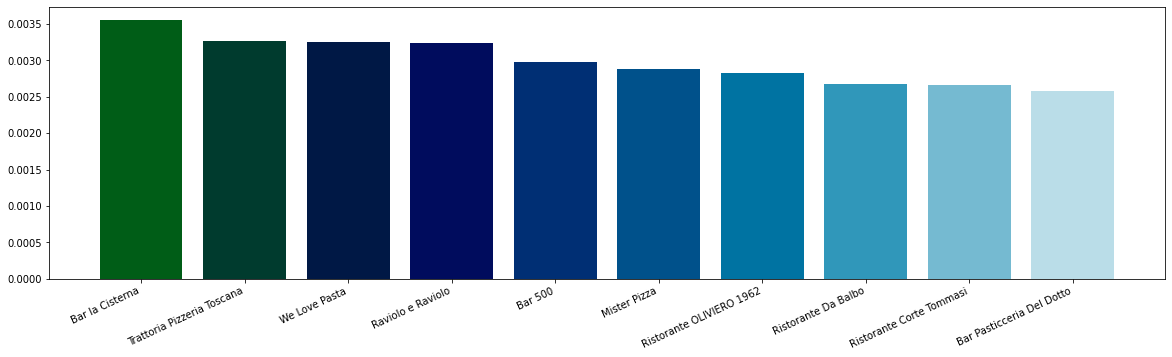

In [76]:
plot_kcentral(G,betweenness_centrality,10)

In [50]:
betweenness_centrality = nx.betweenness_centrality(G, weight="dissimilarity")

In [51]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['weighted_betwenness_centrality'] = betweenness_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

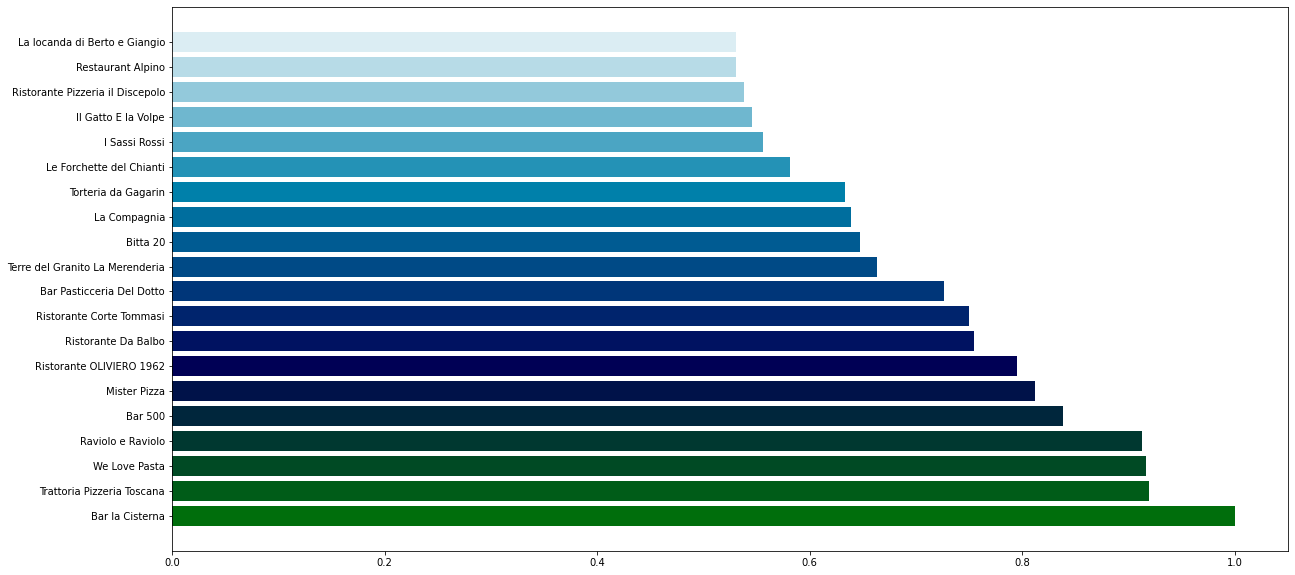

In [120]:
plot_kcentral(G,betweenness_centrality,20,h=True)

### Harmonic Centrality

In [97]:
harmonic_centrality=nx.harmonic_centrality(G, nbunch=None, distance=None)

In [98]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['harmonic_centrality'] = harmonic_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

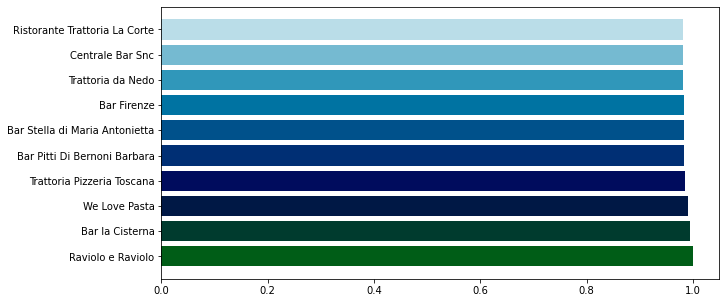

In [121]:
plot_kcentral(G,harmonic_centrality,10,h=True)

In [102]:
harmonic_centrality=nx.harmonic_centrality(G, nbunch=None, distance='dissimilarity')

In [103]:
with open(filename,'r') as jf: centralities = json.load(jf)

centralities['weighted_harmonic_centrality'] = harmonic_centrality

with open(filename,'w') as jf: json.dump(centralities,jf)

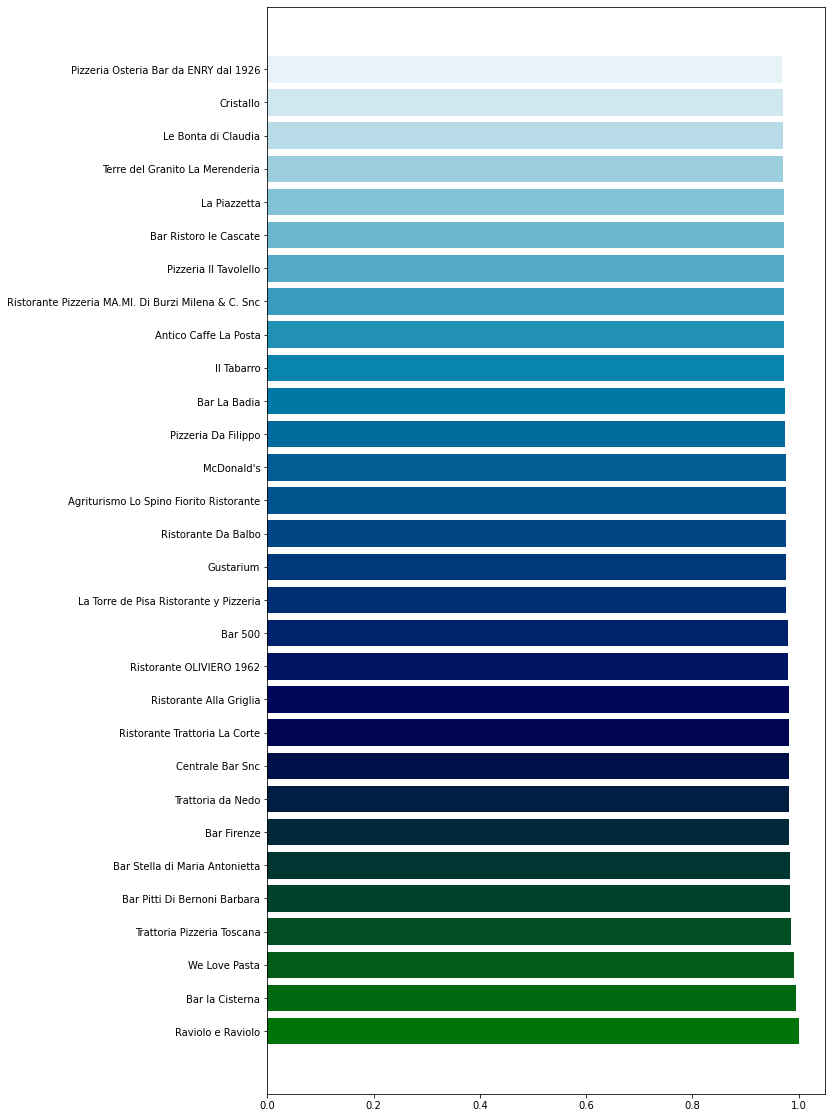

In [122]:
plot_kcentral(G,harmonic_centrality,30,h=True,size=(10,20))

# All Centralities

In [4]:
with open(filename,'r') as jf: centralities = json.load(jf)

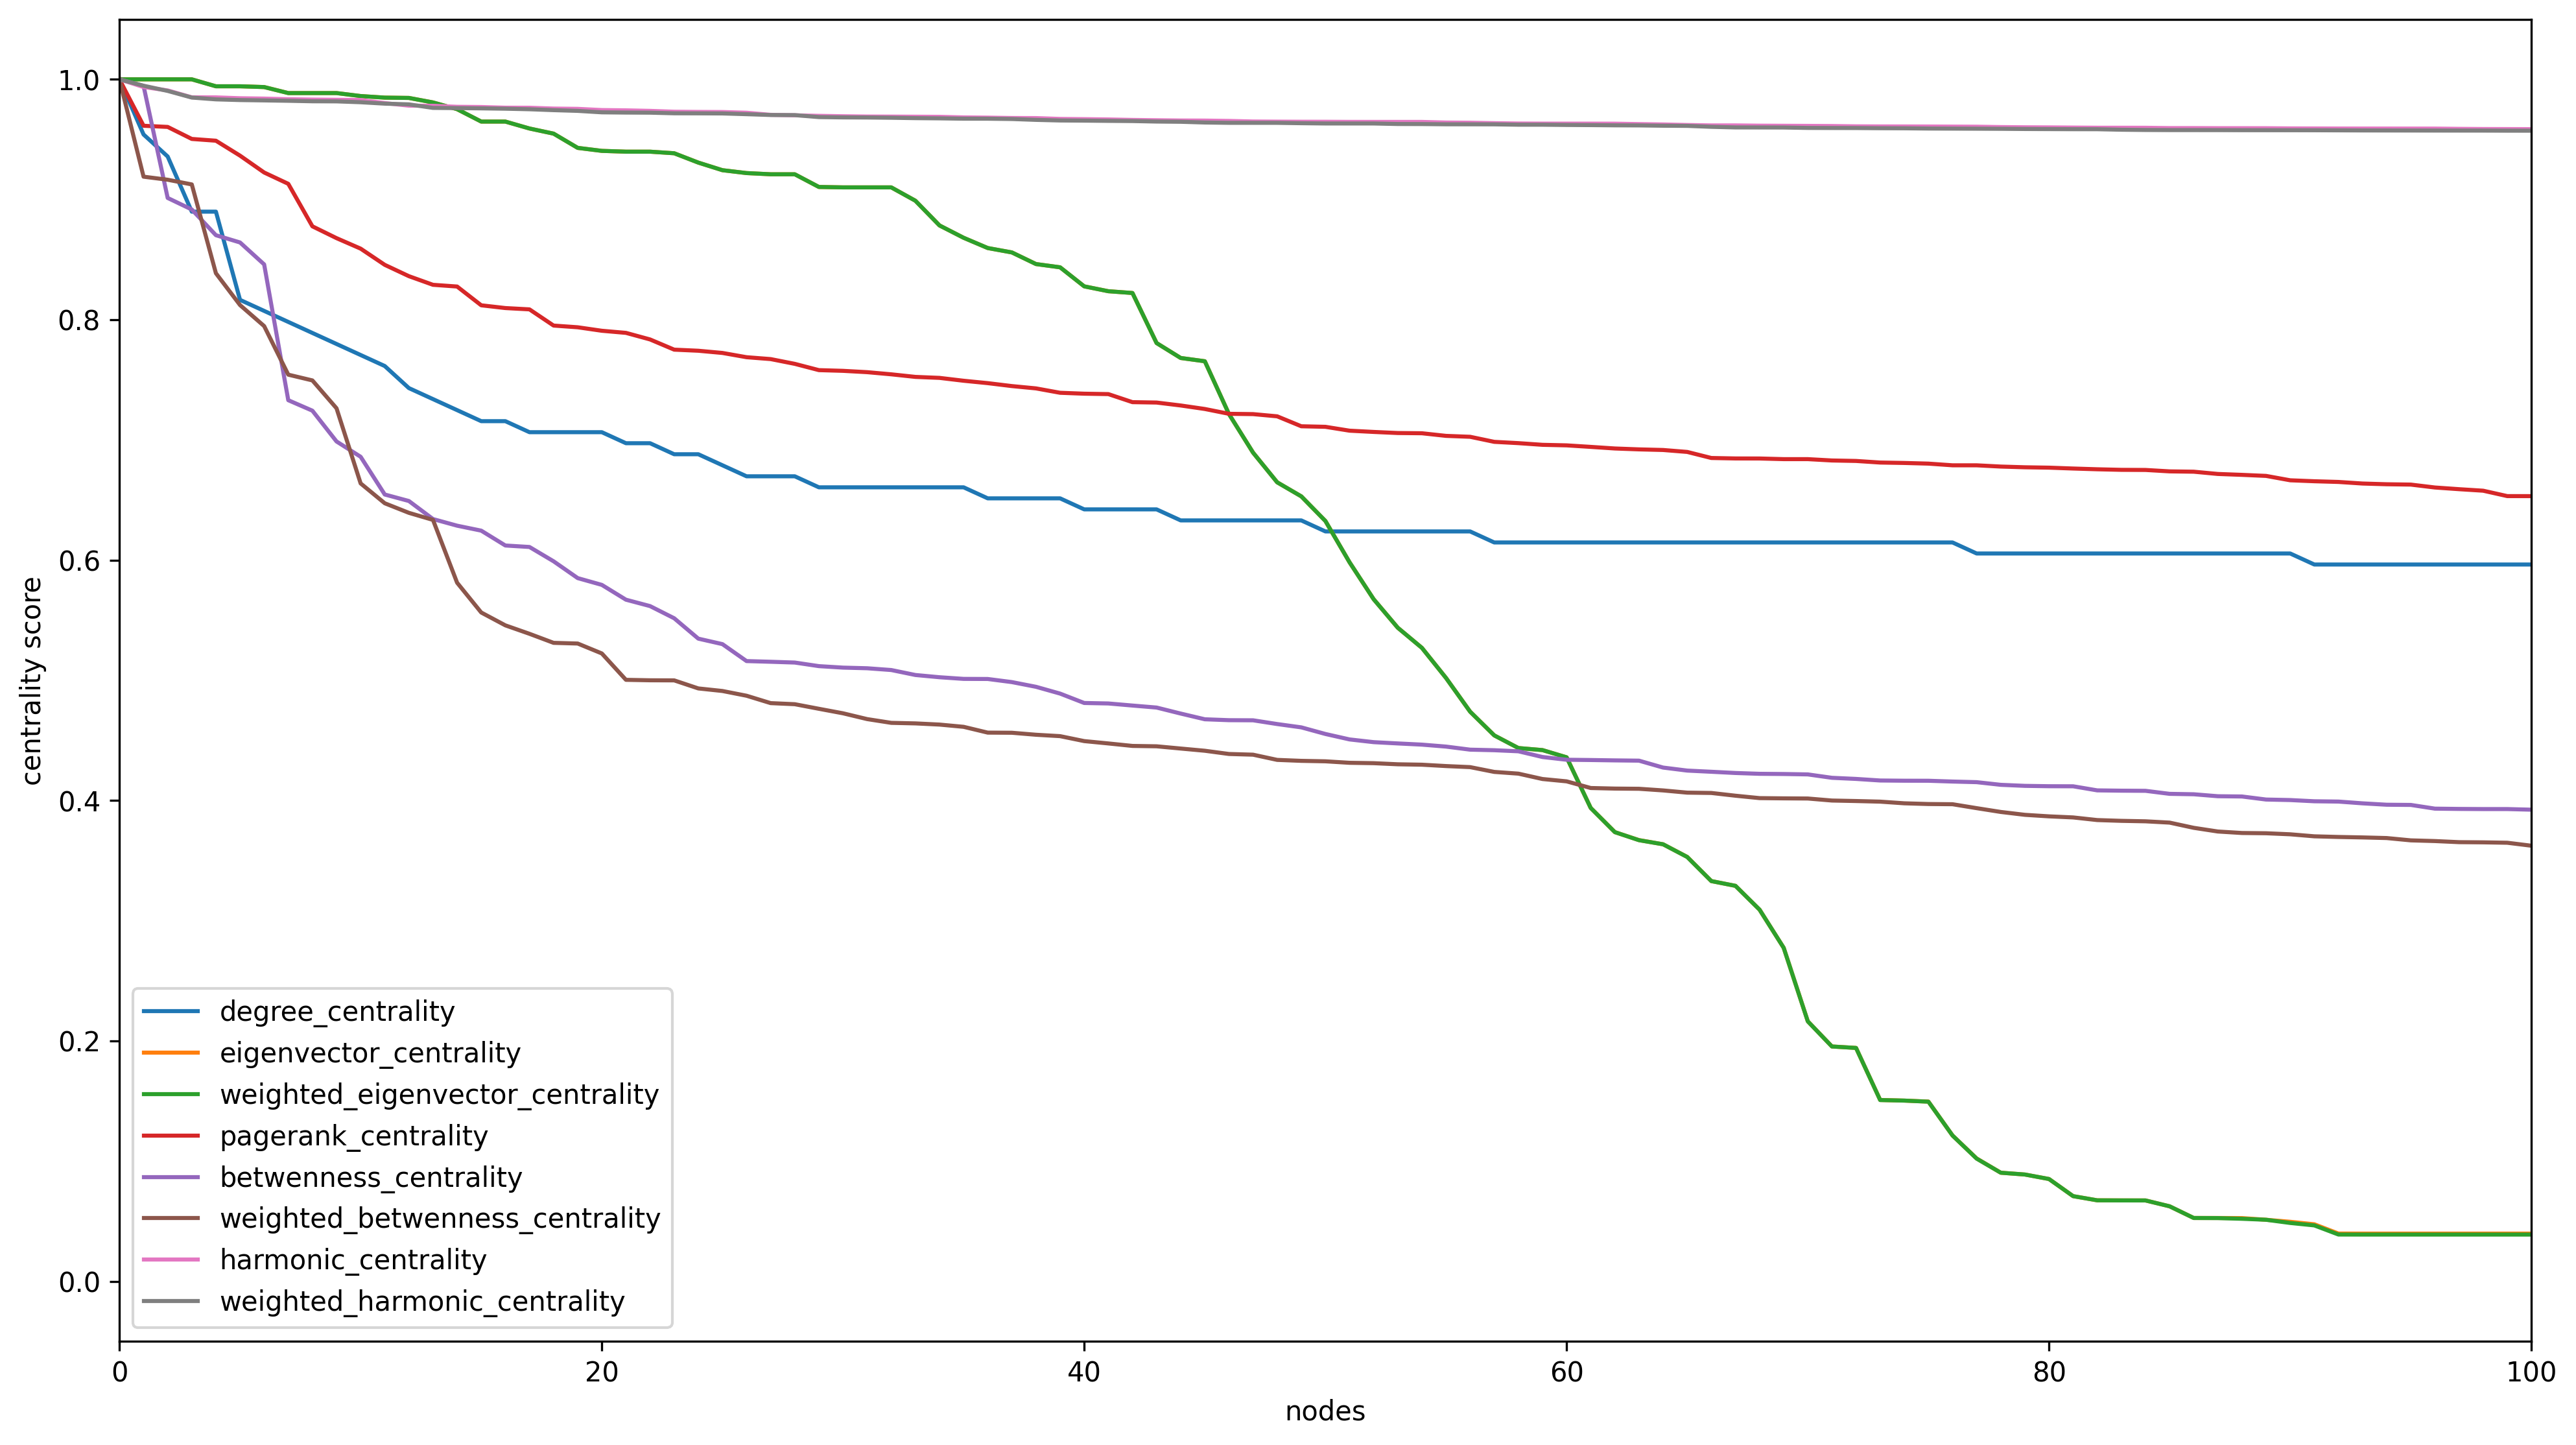

In [6]:
plt.figure(figsize=(16,9),dpi=300)

for name, centrality in centralities.items():
    sorted_dictionary =  sorted(centrality.items(), key=lambda x: x[1],reverse = True)
    
    nodes, values = zip(*sorted_dictionary)
    maxval = max(values)
    minval = min(values)
    normalizer = maxval - minval 
    values = [(value - minval)/normalizer for value in values]
    plt.plot(values)
    
plt.xlabel('nodes')
plt.ylabel('centrality score')
plt.xlim(0,100)
plt.legend( [name for name, centrality in centralities.items()])
plt.show()

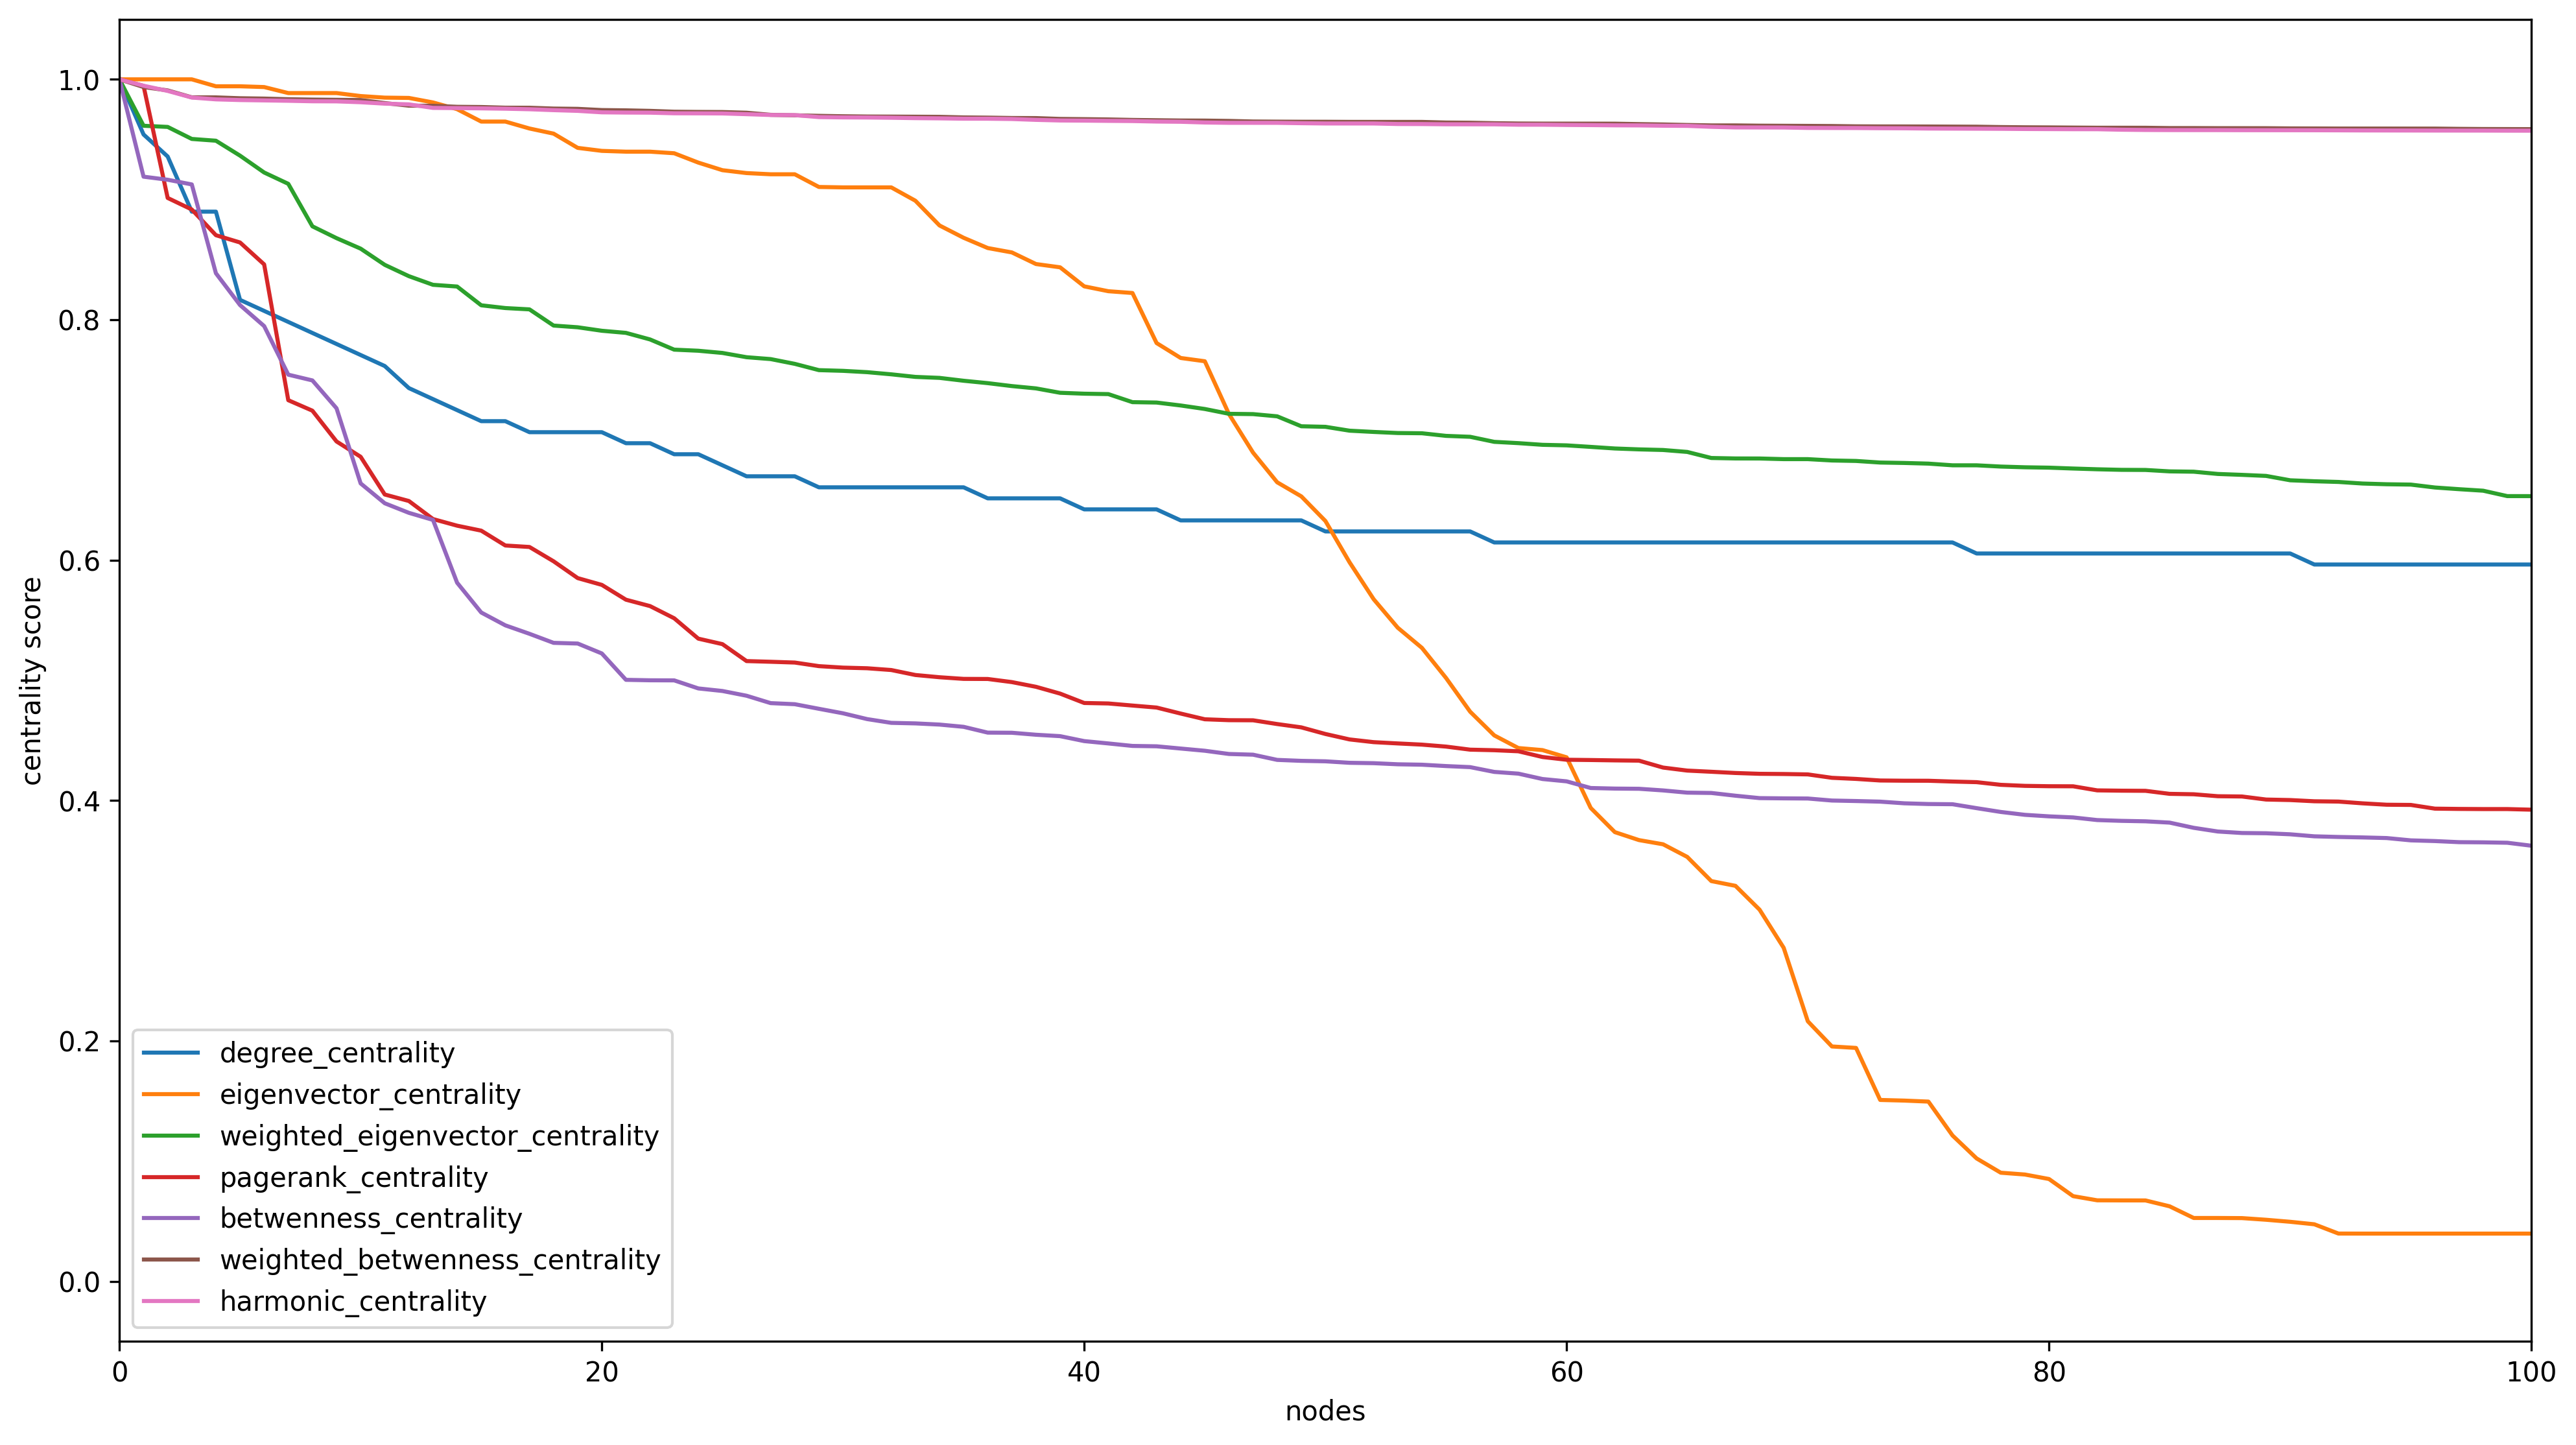

In [9]:
plt.figure(figsize=(16,9),dpi=300)

for name, centrality in centralities.items():
    if name == 'weighted_eigenvector_centrality': continue
    sorted_dictionary =  sorted(centrality.items(), key=lambda x: x[1],reverse = True)
    
    nodes, values = zip(*sorted_dictionary)
    maxval = max(values)
    minval = min(values)
    normalizer = maxval - minval 
    values = [(value - minval)/normalizer for value in values]
    plt.plot(values)
    
plt.xlabel('nodes')
plt.ylabel('centrality score')
plt.xlim(0,100)
plt.legend( [name for name, centrality in centralities.items()])
plt.show()